# Tutorial 1: Setting Up A Calling Script and Running QUAD

In this example, we will set up a standard calling script to demonstrate how to execute QUAD. This will be exemplified by refining the instrumental parameters of a laboratory x-ray diffractometer using a pattern from a NIST standard reference material 660a lanthanum hexaboride powder sample. The data was collected on the [PANalytical Empyrean](https://www.aif.ncsu.edu/empyrean/) x-ray diffractometer in the Bragg Brentano configuration at the [Analytical Instrumentation Facility](https://www.aif.ncsu.edu/) at North Carolina State University. The data file can be downloaded from the GitHub page in the demos folder and is called 'Example_Empyrean_LaB6.gpx'. 

A completed example script can be found on the [GitHub project page](https://github.com/rabroughton/QUAD) in the demos folder. It is recommended to ues this for reference, but to still read the tutorials in order to learn how to adjust the inputs for your specific experiment and to better understand the outputs. 

If you do not yet have Python, QUAD, and GSAS-II installed on your machine, please refer back to __Tutorial 1: Installation Instructions__ before proceeding with this tutorial. 

## Open a blank script

Open up your environment or notebook of choice and create a new script. Within this script, we will setup and call the QUAD software. If you are new to Python and followed the Anaconda installation instructions, then open up the Anaconda Navigator and launch Jupyter Notebook. In Jupyter Notebook, direct to the folder where the gpx file is saved and click on New -> Notebook Python 3 to create a new script.

## Import packages

First, we will import the necessary packages into your Python script for setting up a file to run QUAD. Write the following statements at the top of your script.  

In [1]:
from __future__ import division
import numpy as np
import sys
import os

Next, the path to the files from the GSAS-II software must be appended to the script path. You will need to locate the GSAS-II program folder on your computer. The path will vary depending on how and where GSAS-II was downloaded. If you do not where it is located, you can search your computer for the folder called 'GSASII'. Insert the path to the folder on your computer in < path > below.

In [ ]:
sys.path.append('<path>/GSASII')
sys.path.append('<path>/GSASII/bindist')

For a Mac system, it may be necessary to add '<path>/GSASII/fsource' to the path rather than the bindist folder indicated above. This will most likely be the case if you get a GSASII error when running the script. 
    
For a Windows system, it may be necessary to experiment with the file paths and pointing to the correct GSAS-II folders. If the sys.path.append command is unsuccessful in locating the folders, then instead try:

In [ ]:
sys.path.insert(0, r'C:<path>\GSASII')
sys.path.insert(1, r'C:<path>\GSASII\bindist')

Next, we will import the functions from the QUAD package that you installed from GitHub. The gsas_tools file contains the necessary functions to interface with GSAS-II. The dram function contains the Delayed Rejection Adaptive Metropolis algorithm, which will perform the Bayesian analysis on your profile model and data via Markov chain Monte Carlo sampling. This function is what will produce the posterior probability distributions on your parameters. 

In [3]:
from QUAD import dram
from QUAD import gsas_tools as gsas

## Load the GSAS-II gpx file

You will need to initialize the sampling performed by QUAD with a good Rietveld refinement in GSAS-II. It is important that all the information that is known about your material and experimental system is inputted to the GSAS-II refinement. QUAD will interface with the GSAS-II software and take the phase information and diffraction data directly from the GPX file. For this example, we will be using the GPX file called 'Example_Empyrean_LaB6.gpx' which you can find on the [GitHub project page](https://github.com/rabroughton/QUAD) in the demos folder. Save this file in the same folder that your script is located. This file has alredy undergone a Rietveld refinement, and so will not need to be opened or further refined for this example. For more information about Rietveld refinement with the GSAS-II software, please visit the [GSAS-II website](https://subversion.xray.aps.anl.gov/trac/pyGSAS). 

Now that we have a good initial least-squares refinement from GSAS-II, we can load the GPX file into our script and initialize our GSAS Calculator. 

In [4]:
gpxFile = 'Example_Empyrean_LaB6.gpx'
Calc = gsas.Calculator(GPXfile=gpxFile)

At this point, you can save the script and run it to make sure everything is working properly. If errors are returned, you will need to fix what is causing the error before continuing. It may be necessary to close the notebook and restart if you have just installed QUAD. 

## Paramater Selection

There are many parameters that can be refined in GSAS-II and thus, also with QUAD. The variables chosen to refine will depend on your specific experiment. In QUAD, all of the parameters will be refined simultaneously.  

It is easiest to start by selecting all of the parameters that you wish to refine in the GSAS-II gpx file and saving the file. To see what parameters are selected for refinement in the gpx file, open up the project file in GSAS-II and click on the tab Calculate -> View LS params. A separate window will pop up and you can select the different parameter types to see all of the parameters being refined (as marked with an R) and all of the possible parameters. Note the unique naming convention. This same naming convention will be used as the parameter names in QUAD. For more information, see the [GSAS-II Help File](https://subversion.xray.aps.anl.gov/pyGSAS/trunk/help/gsasII.html#main_menu) -> 4. Main GSAS-II menu commands -> 3. Menu **Calculate**.

The parameters that will be used in this example are named and described as follows:
* **K$\alpha_1$/K$\alpha_2$ intensity ratio:** ':0:I(L2)/I(L1)'
* **Polarization correction:** ':0:Polariz.'
* **Axial divergence:** ':0:SH/L'
    * Finger, Cox, & Jephcoat peak asymmetry correction from axial divergence
* **Cagliotti peak parameters:** ':0:U', ':0:V', ':0:W'
* **Lorentzian peak broadening parameters:** ':0:X', ':0:Y'
* **Histogram scale factor:** ':0:Scale'
* **Sample displacement** ':0:Shift'
    * Bragg-Brentano sample displacement
* **Background parameters:** ':0:Back:x'
    * x represents the background coefficient number

This is not an exhaustive list of all the parameters that are capable of being refined in QUAD. Most, but not all, of the profile and structural parameters that are capable of being refined in GSAS-II can also be refined in QUAD. Some additional common parameters the may be refined include microstrain, size, and lattice parameters (a, b, c, alpha, beta, gamma).

As a default, QUAD will select the same parameters that have the 'Refine' checkbox selected in the GPX file. Thus, it is necessary to select all the parameters you wish to refine in QUAD in the GSAS-II refinement. The following lines of code should be added to your script to print out the current parameters set to be refined. 

In [5]:
print('Parameters from gpx file')
print(Calc._varyList)

Parameters from gpx file
[':0:Back;0', ':0:Back;1', ':0:Back;2', ':0:Back;3', ':0:Back;4', ':0:Back;5', ':0:I(L2)/I(L1)', ':0:Polariz.', ':0:SH/L', ':0:U', ':0:V', ':0:W', ':0:X', ':0:Y', ':0:Scale', ':0:Shift']


After examining which profile and structural parameters are in the list, parameters can be deleted or added from the refinement list. For this example, we will remove the background coefficients and add the sample displacement. QUAD internally handles the background fitting, so the background coefficients do not need to be set to refine. An example of how to add parameters is also included. 

In [6]:
# Delete parameters you do not want to refine from the paramList
paramList = [key for key in Calc._varyList if ('Back;' not in key)]

# Add parameters you do want to refine to the paramList
# paramList.append('parameter_name')

If you would like to refine lattice parameters in your run, you must add the following lines of code here (but do not add for this tutorial). The unit cell will be refined in QUAD as parameters a, b, c, alpha, beta, and gamma with symmetry constraints based on the symmetry defined in your GSAS-II refinement.

In [ ]:
paramList, start = dram.define_lattice(paramList=paramList, Calc=Calc)

Finally, we must set the parameters to vary in the sampling equal to the parameter list that you have just created.

In [7]:
variables = np.copy(paramList)

## Initialize Parameter Values

The initial parameter values for QUAD are taken from the GSAS-II least-squares refinement output. All parameters not selected for refinement in QUAD will remain fixed at the values saved in the gpx file. Run the following line of code to pull the parameter values out of the GPX file. The values in 'start' will correspond to the parameters defined in paramList and will be in the same order. 

In [8]:
start = [Calc._parmDict[param] for param in paramList] 

**Note:** If you are refining lattice parameters and added the 'dram.define_lattice' command above, you do NOT need to add this start line. The starting values for all parameters will be setup internally in the 'define_lattice' function. 

It is a good idea to print the parameter names and initial values to the console to double check that the correct parameters of interest are selected. This will also be helful for defining the parameter bounds. Type the following lines of code and observe the output in your console. 

In [9]:
print('Final parameters:')
print (paramList)
print('Initial parameter values:')
print(start)

Final parameters:
[':0:I(L2)/I(L1)', ':0:Polariz.', ':0:SH/L', ':0:U', ':0:V', ':0:W', ':0:X', ':0:Y', ':0:Scale', ':0:Shift']
Initial parameter values:
[0.47749513541933664, 0.566224934629247, 0.057350530494806595, 4.827750388834746, -3.117804219578415, 0.8647616479254988, 0.5731875722658866, 3.9335660716796594, 42.21100647578433, -40.586788536515975]


This would be another good point to save and run your script to make sure everything is functioning properly. 

## Parameter Bounds

The parameters that will undergo the analysis must be given upper and lower bounds based on prior knowledge from the user. An upper and lower bound must be chosen separately for each parameter of interest. For example, a user may be certain that a parameter can not be negative and, consequently, set the lower bound on that parameter to zero. Any values outside the upper and lower bounds will be inaccessible to the parameter sampling, so it is important to make sure that you do not limit the parameter space too much by the bounds. On the other hand, not limiting the parameter space enough could result in poor acceptance or extended runtimes becuase the sampler is exploring too many unlikely possibilities. Therefore, it is necessary to experiment with the bounds and observe the resulting sampling and posterior parameter distributions to determine the bound values. 

The order of the upper and lower bound vector entries must correspond to the order of the parameter list. The parameter list was printed to the console in the previous section to ease the matching process. 

**Note 1:** The initial parameter value must not be exactly in the middle of the upper and lower bounds. So, you could have an upper bound of + 15% of the initial parameter values and a lower bound of - 10%, but you could not have upper and lower bounds of +/- 15% of the initial parameter values. This limitation comes from an internal parameter mapping process. 

**Note 2:** The initial parameter value MUST be inside the range of the lower and upper bound. 

Define the upper and lower bounds as separate numpy arrays with entries that correspond to the parameter list. For this example, we will use the upper and lower bounds listed below. The order matches that of the parameter list:

[':0:I(L2)/I(L1)', ':0:Polariz.', ':0:SH/L', ':0:U', ':0:V', ':0:W', ':0:X', ':0:Y', ':0:Scale', ':0:Shift']

In [10]:
lower = np.array([0.45, 0.0, 0.01, 0.0, -20.0, 0.0, 0.0, 0.0, 20.0, -100.0])
upper = np.array([0.55, 1.0, 0.10, 20.0, 0.0, 20.0, 5.0, 5.0, 80.0, 100.0])

### Errors

The following errors could be returned for improper specification of prior bounds:

* "Number of upper/lower bounds provided is not valid." $\rightarrow$ The number of upper or lower bound values entered does not match the number of parameters being refined.
* "Upper bound is less than starting value. Check entry number xx." $\rightarrow$ One of the upper bounds specified is less than the starting value for that parameter. The error will return the number of the first entry in the upper bound array that has this issue, with index starting from zero.
* "Lower bound is greater than starting value. Check entry number xx." $\rightarrow$ Same as previous error, but for a lower buond greater than the starting parameter value.
* "Starting value must not be exactly in the middle of bound range. Check entry xx." $\rightarrow$ One of the starting parameter values falls exactly in the middle of its upper and lower bounds. This is not allowed becauses it results in errors with estimating the covariance matrix that will cause issues down the road.




## Initial Covariance

Initializing the proposal covariance for DRAM is a **very important step**, espeically if you have a large dataset or sensitive and non-identifiable parameters. We will use the estimated covariance from the GSAS-II results. Just copy the code below for this example and more information on initializing the covariance can be found in **Tutorial 4: Initializing the proposal covariane**. This covariance matrix will adapt automatically within the algorithm to find the correct values. 

In [12]:
init_cov_dict = dram.estimatecovariance(paramList=paramList,
                                        start=start,
                                        Calc=Calc,
                                        upper=upper,
                                        lower=lower,
                                        delta=1e-4)
init_cov = init_cov_dict["cov"]

Covariance eignvalues:
[8.41279563e-01 3.72010920e-01 8.60814138e-02 1.78371496e-02
 8.70951254e-03 1.91589289e-03 5.15485522e-04 3.05942151e-04
 8.12322271e-05 1.72497689e-05]


## Other DRAM inputs

The other inputs needed for the process are defined as follows:

* **samples:** The number of total iterations to run. A recommended range is 1,000 - 100,000+. With a larger number of samples, better convergence of parameter distributions can be obtained as well as a more accurate observation of behavior. It is best to run the function with a small number of samples first to test and see if everything is working properly. For example, I may first run 100 samples, then 1,000, and then 10,000. Default is 5,000 samples.
* **burn:** The number of iterations to count as burn-in. These samples will not be stored, so if you would like to save all the samples and decide where to cut off the burn in, set this equal to zero. Default is 2,000. This period of sampling allows the algorithm to "warm-up" and ensure that samples are being collected from the posterior parameter distributions.
* **update:** An update on the progress of the sampling will be printed to the console on this interval. Default is 500.  
* **shrinkage:** The shrinkage factor (or scaling parameter) influences the delayed rejection component of the DRAM. It narrows (or shrinks) the second stage proposal distribution. The default value is 0.2. 
* **adapt:** The adaption interval for the adaptive metropolis component of the DRAM. A larger interval size results in less adaption and a more 'natural' sampling. A smaller value produces more frequent adaption and increases the algorithm's robustness. The default value is 20. A value of 50-100 is recommended if you are achieving good sampling and fitting. A lower value can be used if more adaption is desired. 

For this example, we will set these values as listed in the code below.

In [26]:
samples = 2500
burn = 500
update = 500
shrinkage = 0.2
adapt = 50

## Setup the Output Folder

To save your results after the DRAM sampling is completed, you will need to setup a folder and define the path now. Feel free to name the folder however you like. If you will be performing many runs, one suggested naming convention is to use the gpx file name as the folder name where the results will be stored. This path definition and folder creation from the working directory is shown in the code below. Here, the path where the results will be saved is in a folder called 'results' that was previously created in the current working directory.

In [27]:
filename = os.path.split(gpxFile)
foldername = filename[1].split('.')
path = './results/' + foldername[0] + '_test'    # + other naming information
os.mkdir(path)

## Run the DRAM Sampling

Now that the script is all set up, you can call the function to run the sampling through the DRAM algorithm. Copy the lines below into your script.

DRAM with iters=2500 and burn=500
Collected 500 of 2000 samples
  0.01 acceptance rate for Stage 1 (1000 attempts)
  0.06 acceptance rate for Stage 2 (992 attempts)


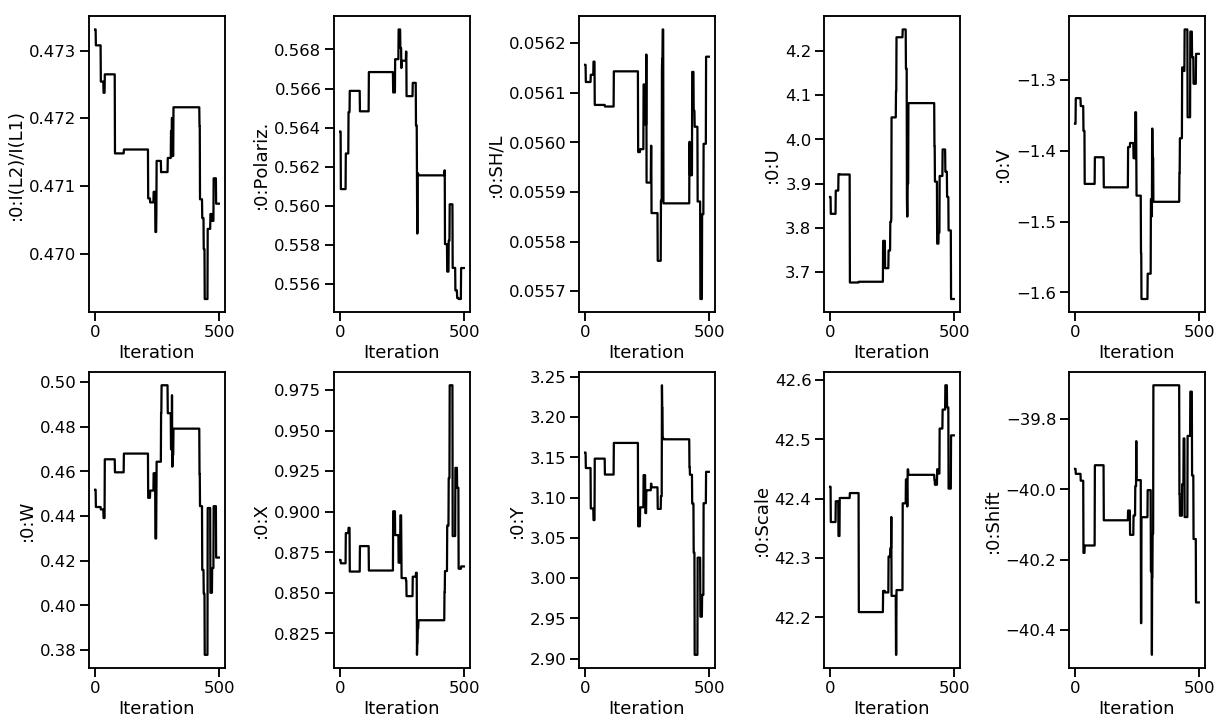

Collected 1000 of 2000 samples
  0.01 acceptance rate for Stage 1 (1500 attempts)
  0.06 acceptance rate for Stage 2 (1488 attempts)


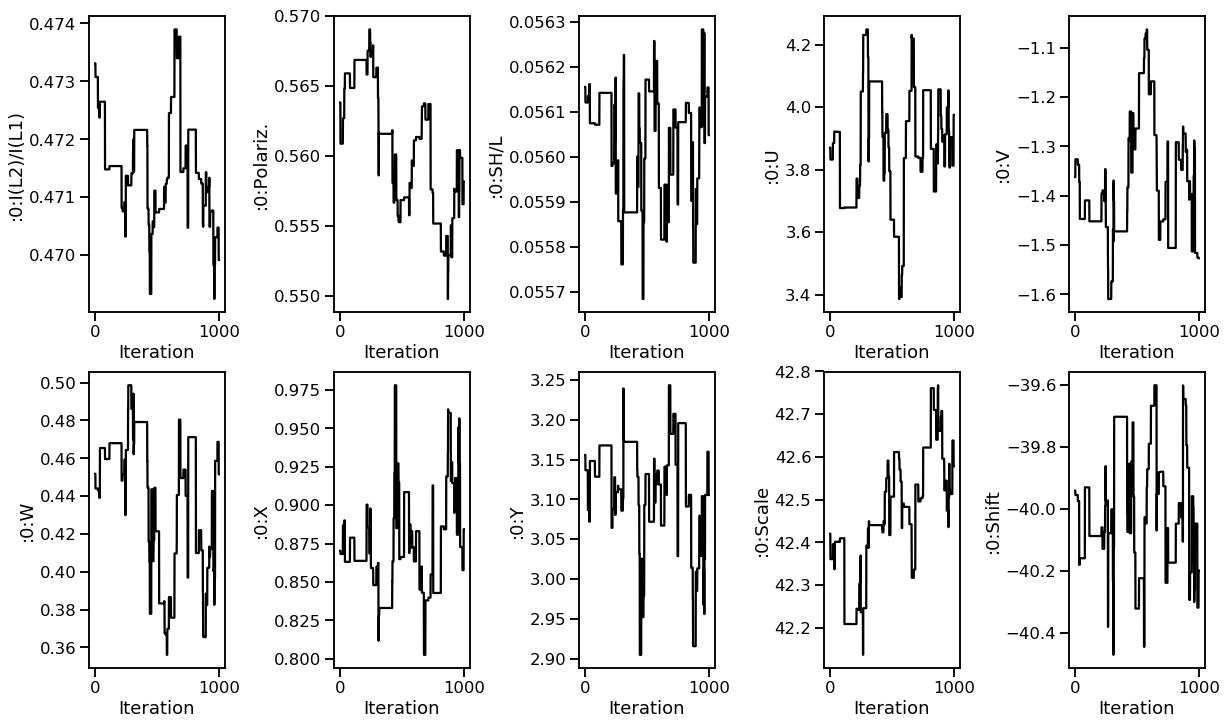

Collected 1500 of 2000 samples
  0.01 acceptance rate for Stage 1 (2000 attempts)
  0.05 acceptance rate for Stage 2 (1987 attempts)


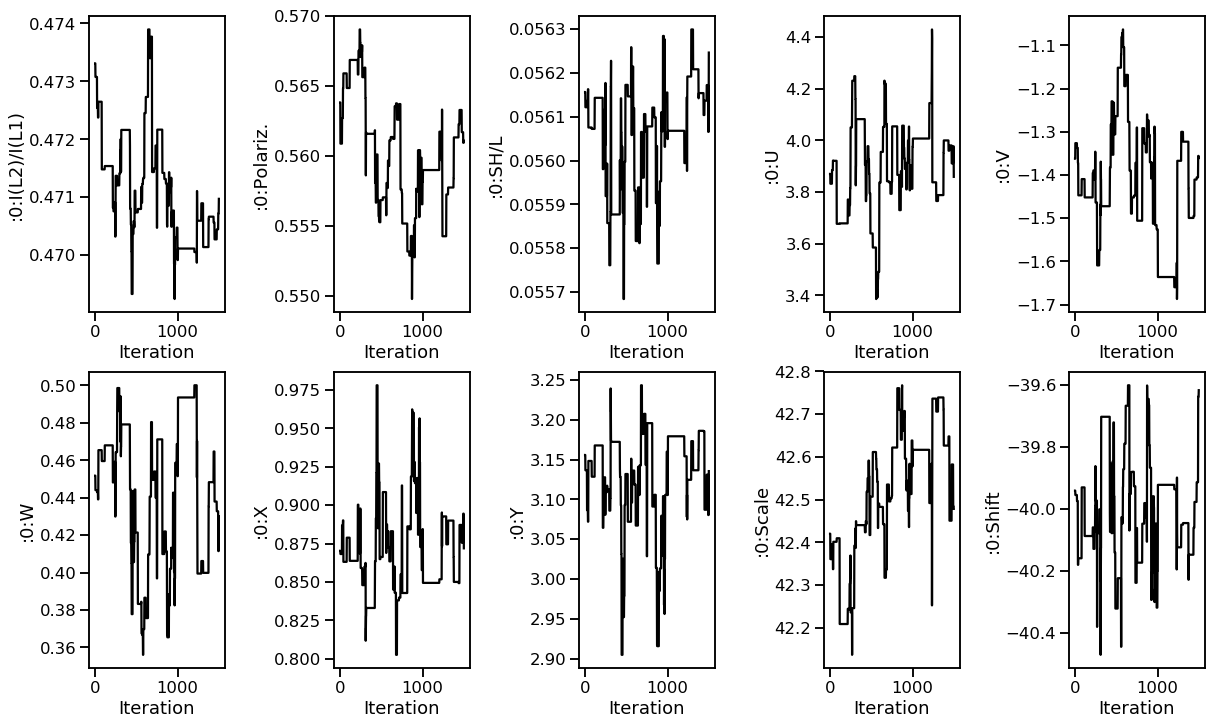

Collected 2000 of 2000 samples
  0.01 acceptance rate for Stage 1 (2500 attempts)
  0.07 acceptance rate for Stage 2 (2483 attempts)


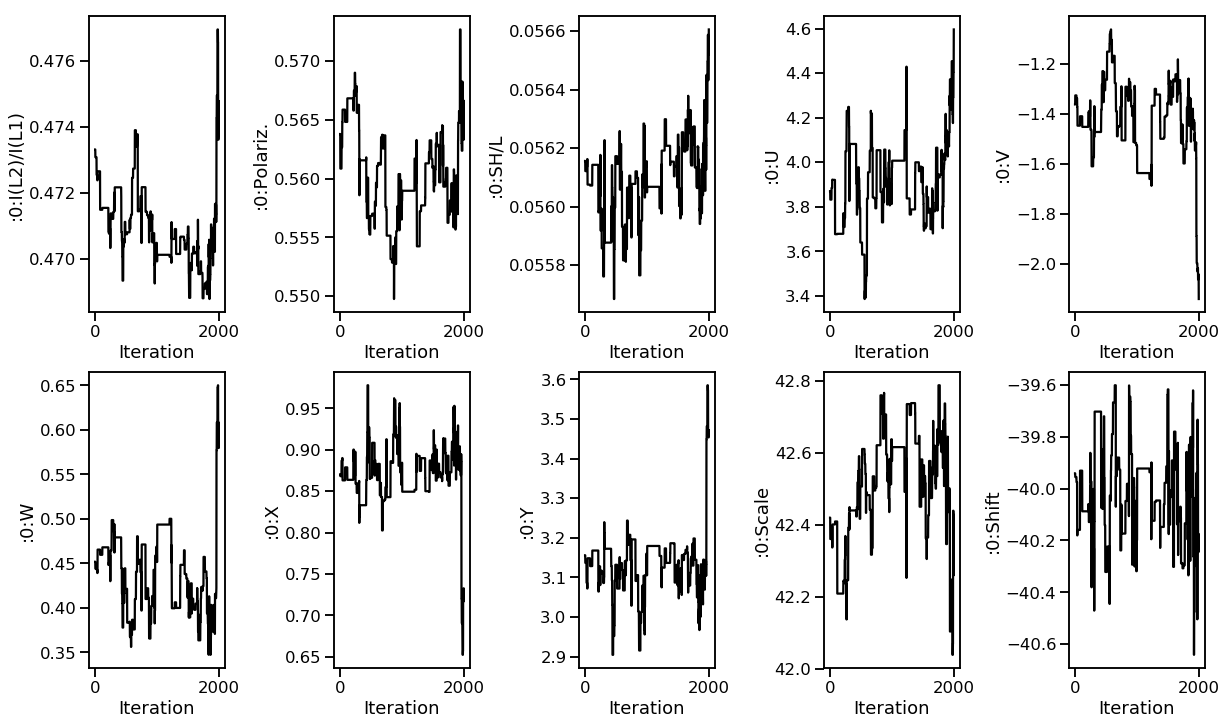

In [28]:
print('DRAM with iters={} and burn={}'.format(samples, burn))
results = dram.sample(GPXfile=gpxFile,
                      paramList=paramList,
                      variables=variables,
                      start=start,
                      lower=lower,
                      upper=upper,
                      path=path,
                      initCov=init_cov,
                      shrinkage=shrinkage,
                      adapt=adapt,
                      iters=samples,
                      burn=burn,
                      update=update,
                      plot=True)

Go ahead and save your script. You can run it to test for functionality and any errors. You will be able to tell that the sampling is running by observing the traceplots appear in the output. The run is complete when all the sampling is finished. For this case, it will print "Colleccted 2000 of 2000 samples" since the number of samples was set to 2500 with 500 burnin. This will take about ten minutes, so please be patient.

Now that you are familiar with running QUAD, it is time to begin understanding and analyzing the results. 

## Save the Results

Running the command in the code box below will automatically save the results from the sampling run into the defined folder path. 

In [29]:
dram.save_results(results=results,
                  start=start,
                  lower=lower,
                  upper=upper,
                  paramList=paramList,
                  init_cov=init_cov,
                  path=path)

Take a look in your results folder to check and see if the files saved. 

The most informative result is the parameter samples. If you open up the 'parameter_samples' file in a notepad, you should see many rows and columns of numbers. Every column in the file is a parameter that was refined in the run in the order that the parameters were input. In this example, the columns are ':0:I(L2)/I(L1)', ':0:Polariz.', ':0:SH/L', ':0:U', ':0:V', ':0:W', ':0:X', ':0:Y', ':0:Scale', and ':0:Shift'. Every row in the file is a set of samples from one iteration of the DRAM sampler. This does not include the burnin period. These samples are what make up the posterior parameter distributions. This provides the information about each parameter which can be analyzed through plots, posterior means, and credible intervals. 

The remaining saved files are briefly described as follows. Since they are saved, they can be loaded into python later for further plotting, analysis, and calculations.
* **final_covariance:** the final adapted covariance of the proposal distribution.
* **gamma_samples:** related to the background fitting, used to calculate the posterior prediction intervals on the model which is explained in a later tutorial. 
* **initial_proposal_covariance:** the matrix that was used to initialize the covariance of the proposal distribution. 
* **lower_prior_bounds:** the input lower bounds on the prior.
* **model_variance:** overall model variance for each sample. This will be used to calculate the posterior prediction intervals, which are explained in a separate tutorial.
* **Parameter_list:** list of parameters that were refined in this run. This is helpful for post-processing and creating plots.
* **parameter_starting_values:** the starting values for all parameters from the GSAS-II Rietveld refinement. This can be used to study the QUAD rand GSAS-II results side-by-side.
* **posterior_parameter_means:** the mean parameter values from the posterior distributions. 
* **run_time_mins:** the amount of time it took to run the sampler in minutes.
* **Stage1_acceptance:** acceptance rate for stage 1 sampling. Optimizing this is explained in a later tutorial.
* **Stage2_acceptance:** acceptance rate for stage 2 sampling. Optimizing this is explained in a later tutorial.
* **upper_prior_bounds:** the input upper bounds on the prior.

## Summarize the Results

The results can be examined in a variety of ways that are explained in other tutorials. For a simple examination of the parameter results, you can compare the mean posterior parameters with the least-squares fit from GSAS-II that was used to initialize the Bayesian fitting. You can also look at the posterior distributions for each parameter to examine the shape and uncertainty about the parameter.

Running the command 'dram.run_summary' will print the mean parameter estimates and print and save the normalized posterior parameter distributions. In this example, not enough samples have been run and the posterior distributions are not well-converged, so many more sample would need to be run to produce and acceptable result. Convergence is disucussed in a separate tutorial.

Mean parameter estimates:
:0:I(L2)/I(L1) Rietveld: 0.4775, QUAD: 0.4709
:0:Polariz. Rietveld: 0.5662, QUAD: 0.5604
:0:SH/L Rietveld: 0.0574, QUAD: 0.0561
:0:U Rietveld: 4.8278, QUAD: 3.9150
:0:V Rietveld: -3.1178, QUAD: -1.4258
:0:W Rietveld: 0.8648, QUAD: 0.4382
:0:X Rietveld: 0.5732, QUAD: 0.8699
:0:Y Rietveld: 3.9336, QUAD: 3.1340
:0:Scale Rietveld: 42.2110, QUAD: 42.5129
:0:Shift Rietveld: -40.5868, QUAD: -40.0113
Model Time: 7.83 minutes (DRAM)


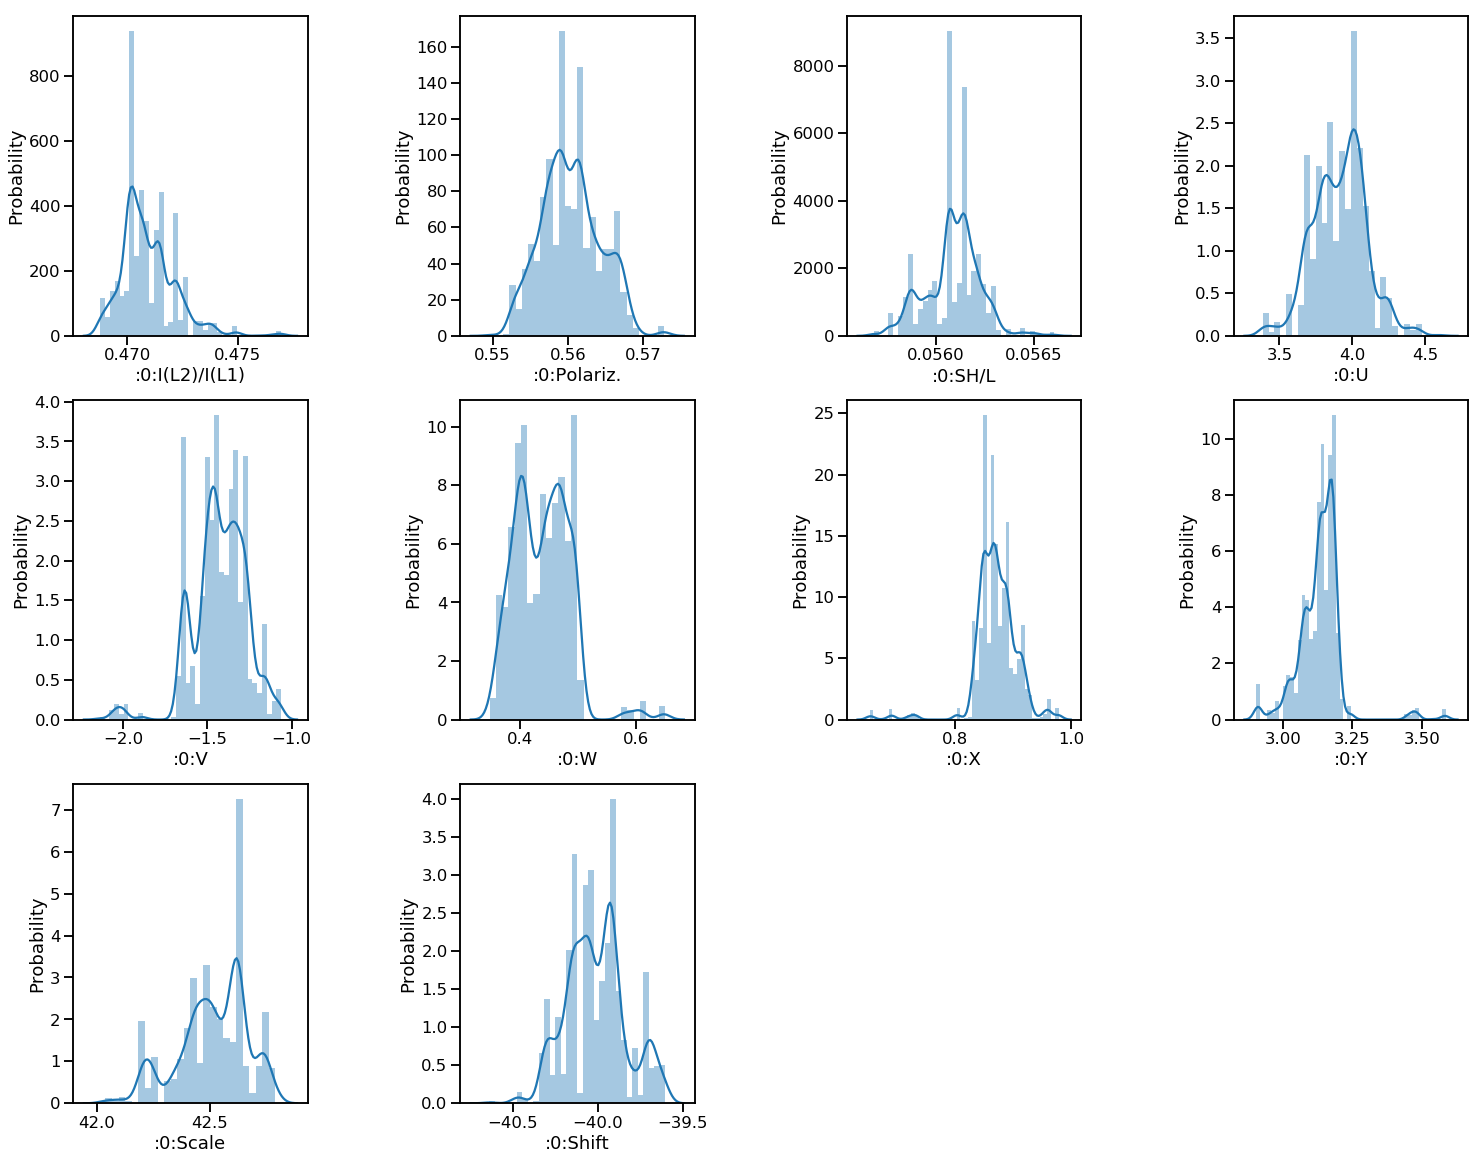

In [30]:
dram.run_summary(results=results,
                 start=start,
                 paramList=paramList,
                 path=path)